In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.optimizers import *
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [2]:
df=pd.read_csv('Cleaned_Data.csv')

In [3]:
df.head()

,id,keyword,location,text,target
0,0,ablaze,NaN,communal violence bhainsa telangana stone pelt...,1
1,1,ablaze,NaN,telangana section imposed bhainsa january clas...,1
2,2,ablaze,USA,arsonist set car ablaze dealership,1
3,3,ablaze,"Morgantown, WV",arsonist set car ablaze dealership,1
4,4,ablaze,NaN,lord jesus love brings freedom pardon fill hol...,0


In [4]:
df.isna().sum()

id             0
keyword        0
location    3418
text           3
target         0
dtype: int64

In [5]:
df.dropna(subset = ['text'],inplace=True)

In [6]:
df.isna().sum()

id             0
keyword        0
location    3417
text           0
target         0
dtype: int64

In [7]:
X = df['text']
y = df['target']

In [8]:
tfidf = TfidfVectorizer(min_df=2, max_df=0.5, ngram_range=(1, 1))
X_tf = tfidf.fit_transform(X)

In [9]:
X_tf=X_tf.toarray()

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X_tf,y,test_size=0.2,random_state=1)

In [11]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(9093, 8954)
(2274, 8954)
(9093,)
(2274,)


In [12]:
X_train = X_train[:, :, None]
X_test = X_test[:, :, None]

## LSTM

In [17]:
model_lstm = Sequential()
model_lstm.add(LSTM(64,input_shape=X_train.shape[1:],return_sequences=True))
model_lstm.add(Dropout(0.4))
model_lstm.add(LSTM(64,input_shape=X_train.shape[1:]))
model_lstm.add(Dropout(0.3))
model_lstm.add(Dense(1,activation='sigmoid'))
model_lstm.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 8954, 64)          16896     
_________________________________________________________________
dropout_4 (Dropout)          (None, 8954, 64)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 49,985
Trainable params: 49,985
Non-trainable params: 0
_________________________________________________________________


In [18]:
model_lstm.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])
history_lstm=model_lstm.fit(X_train, y_train, epochs=10, verbose=1,validation_data=(X_test,y_test))

Epoch 1/10
285/285 [==============================] - 146s 498ms/step - loss: 0.5120 - acc: 0.8106 - val_loss: 0.5003 - val_acc: 0.8008
Epoch 2/10
285/285 [==============================] - 149s 522ms/step - loss: 0.4717 - acc: 0.8206 - val_loss: 0.5040 - val_acc: 0.8008
Epoch 3/10
285/285 [==============================] - 149s 522ms/step - loss: 0.4840 - acc: 0.8153 - val_loss: 0.4998 - val_acc: 0.8008
Epoch 4/10
285/285 [==============================] - 141s 496ms/step - loss: 0.4734 - acc: 0.8208 - val_loss: 0.5007 - val_acc: 0.8008
Epoch 5/10
285/285 [==============================] - 141s 496ms/step - loss: 0.4827 - acc: 0.8143 - val_loss: 0.4997 - val_acc: 0.8008
Epoch 6/10
285/285 [==============================] - 141s 497ms/step - loss: 0.4825 - acc: 0.8154 - val_loss: 0.5024 - val_acc: 0.8008
Epoch 7/10
285/285 [==============================] - 141s 496ms/step - loss: 0.4733 - acc: 0.8210 - val_loss: 0.4996 - val_acc: 0.8008
Epoch 8/10
285/285 [============================

## GRU

In [15]:
model_GRU = Sequential()
model_GRU.add(GRU(64,input_shape=X_train.shape[1:],return_sequences=True))
model_GRU.add(Dropout(0.4))
model_GRU.add(GRU(64,input_shape=X_train.shape[1:]))
model_GRU.add(Dropout(0.3))
model_GRU.add(Dense(1,activation='sigmoid'))
model_GRU.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 8954, 64)          12864     
_________________________________________________________________
dropout_2 (Dropout)          (None, 8954, 64)          0         
_________________________________________________________________
gru_1 (GRU)                  (None, 64)                24960     
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 37,889
Trainable params: 37,889
Non-trainable params: 0
_________________________________________________________________


In [16]:
model_GRU.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])
history_GRU=model_GRU.fit(X_train, y_train, epochs=10, verbose=1,validation_data=(X_test,y_test))

Epoch 1/10
285/285 [==============================] - 141s 478ms/step - loss: 0.5094 - acc: 0.8161 - val_loss: 0.5001 - val_acc: 0.8008
Epoch 2/10
285/285 [==============================] - 135s 475ms/step - loss: 0.4715 - acc: 0.8220 - val_loss: 0.4997 - val_acc: 0.8008
Epoch 3/10
285/285 [==============================] - 135s 475ms/step - loss: 0.4848 - acc: 0.8135 - val_loss: 0.4993 - val_acc: 0.8008
Epoch 4/10
285/285 [==============================] - 135s 475ms/step - loss: 0.4852 - acc: 0.8130 - val_loss: 0.5040 - val_acc: 0.8008
Epoch 5/10
285/285 [==============================] - 136s 477ms/step - loss: 0.4758 - acc: 0.8196 - val_loss: 0.5003 - val_acc: 0.8008
Epoch 6/10
285/285 [==============================] - 135s 475ms/step - loss: 0.4839 - acc: 0.8133 - val_loss: 0.5000 - val_acc: 0.8008
Epoch 7/10
285/285 [==============================] - 136s 478ms/step - loss: 0.4856 - acc: 0.8131 - val_loss: 0.5040 - val_acc: 0.8008
Epoch 8/10
285/285 [============================

## Accuracies and losses

In [24]:
LSTM_history = pd.DataFrame(history_lstm.history) 
GRU_history= pd.DataFrame(history_GRU.history)

LSTM_history.to_csv('LSTM.csv')
GRU_history.to_csv('GRU.csv')

In [25]:
LSTM_history.head()

,loss,acc,val_loss,val_acc
0,0.485871,0.817222,0.500300,0.800792
1,0.476408,0.817332,0.503994,0.800792
2,0.479183,0.817332,0.499780,0.800792
3,0.479017,0.817332,0.500740,0.800792
4,0.478387,0.817332,0.499723,0.800792


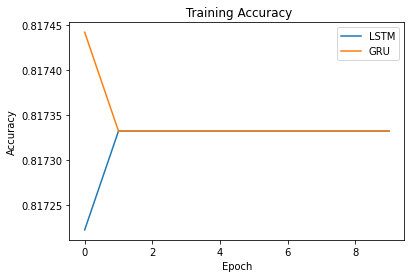

In [26]:
#Training Accuracy
plt.plot(LSTM_history['acc'])
plt.plot(GRU_history['acc'])
plt.title(' Training Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['LSTM', 'GRU'], loc='best')
plt.show()

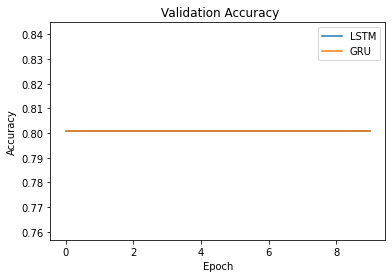

In [27]:
#Validation Accuracy
plt.plot(LSTM_history['val_acc'])
plt.plot(GRU_history['val_acc'])
plt.title(' Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['LSTM', 'GRU'], loc='best')
plt.show()

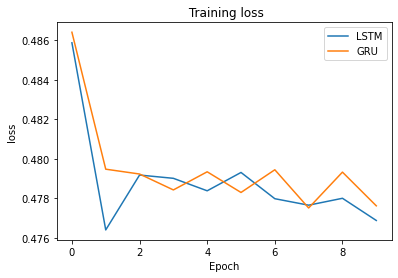

In [28]:
#Training loss
plt.plot(LSTM_history['loss'])
plt.plot(GRU_history['loss'])
plt.title(' Training loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['LSTM', 'GRU'], loc='best')
plt.show()

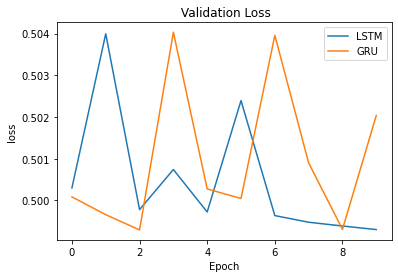

In [29]:
#Validation Loss
plt.plot(LSTM_history['val_loss'])
plt.plot(GRU_history['val_loss'])
plt.title(' Validation Loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['LSTM', 'GRU'], loc='best')
plt.show()